# Récupération des données

## Pour un spectacle donné

In [46]:
import urllib.request
import re
import pandas as pd
import os
# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup
#spectacleId="37982"

#here id example with inside <p> <span class="n"> spectacleId="60720"
spectacleId="60720"
#spectacleId="36956"
#spectacleId="20185"
# specify which URL/web page we are going to be scraping
url = "https://www.lesarchivesduspectacle.net/?IDX_Spectacle=" + spectacleId
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")
#the div where the information is
#the div where the information is
div_interested = soup.find('div', class_='fiche__footer') 
column_label=[]
column_value=[]
for row in div_interested.find_all('table')[0].findAll('tr'):
    th = row.findAll('th')[0].contents[0]
    td = row.findAll('td')[0].contents[0]
    column_label.append(th)
    column_value.append(td)
new_table = pd.DataFrame(columns=column_label, index= [0]) # I know the size
new_table["spectacleId"]=int(spectacleId)
for row in div_interested.find_all('table')[0].findAll('tr'):
    th = row.findAll('th')[0].contents[0]
    td = row.findAll('td')[0].contents[0].strip()
    new_table.at[0,th] = td
#Recuperer creation_date - organism_creation 
#the div where the information is
div_spectacle = soup.find('div', id='div_Spectacle')
p_spectacle = div_spectacle.find_all('p')[0]
if(p_spectacle) != None :
    for time in p_spectacle.findAll('time'):
        if time.has_attr('datetime'):
            new_table["typeDate"]=time.previousSibling
            new_table["date"]=time['datetime']
    for organism in p_spectacle.findAll('a',class_ ='c_Organisme'):
        if organism.has_attr('href'):
            new_table["organismeId"]=organism['href']
            new_table["organismeName"]=organism.contents[0].strip()
    if p_spectacle.find_all('span'):
        first = next(p_spectacle.stripped_strings)
        new_table["to_analyse"]=first
    else:
        new_table["to_analyse"]=p_spectacle.contents[0].string.strip()
    #print(p_spectacle.getText().strip())
    #if p_spectacle.contents[0].strip():
    #for string in p_spectacle.stripped_strings:
    #    print(string[0])
    #new_table["to_analyse"]=p_spectacle.contents[0].string.strip()
    #new_table["to_analyse"]=p_spectacle.stripped_strings[0]
    #print(p_spectacle.stripped_strings[0])
    
        # fetch and print first item
       # first = next(p_spectacle.stripped_strings)
       # print('first item:', first)
    
    #new_table["to_analyse"]=p_spectacle.contents[0].strip()
#new_table.dtypes
#table[0] class="f-spectacle__equipe"    table[1]  class="f-spectacle__equipe"  
#table_production = div_spectacle.find_all('table')[2]
#print(table_production)
new_table



,Genre,Durée,Pays,spectacleId,typeDate,date,organismeId,organismeName,to_analyse
0,Théâtre – Jeune public – à partir de 8 ans,1 heure,France,60720,Création le,2014-03-19,?IDX_Organisme=27836,Le Petit Écho de la Mode,Création le


## Fonction pour récupérer les informations liées à un spectacle


In [47]:
import urllib.request
import re
from bs4 import BeautifulSoup
import pandas as pd
import socket, errno
import sys

def import_df_type_spectacle(spectacleId):
    # specify which URL/web page we are going to be scraping
    url = "https://www.lesarchivesduspectacle.net/?IDX_Spectacle=" + str(spectacleId)    
    try:
        if spectacleId != 0:
            # open the url using urllib.request and put the HTML into the page variable
            page = urllib.request.urlopen(url)
            # parse the HTML from our URL into the BeautifulSoup parse tree format
            soup = BeautifulSoup(page, "lxml")
            div_interested = soup.find('div', class_='fiche__footer') 
            column_label=[]
            column_value=[]
            for row in div_interested.find_all('table')[0].findAll('tr'):
                th = row.findAll('th')[0].contents[0]
                td = row.findAll('td')[0].contents[0]
                column_label.append(th)
                column_value.append(td)
            new_table = pd.DataFrame(columns=column_label, index= [0]) # I know the size
            new_table["spectacleId"]=int(spectacleId)
            for row in div_interested.find_all('table')[0].findAll('tr'):
                th = row.findAll('th')[0].contents[0]
                td = row.findAll('td')[0].contents[0].strip()
                new_table.at[0,th] = td
            #Recuperer creation_date - organism_creation 
            #the div where the information is
            div_spectacle = soup.find('div', id='div_Spectacle')
            p_spectacle = div_spectacle.find_all('p')[0]
            if(p_spectacle) != None :
                for time in p_spectacle.findAll('time'):
                    if time.has_attr('datetime'):
                        new_table["typeDate"]=time.previousSibling
                        new_table["date"]=time['datetime']
                for organism in p_spectacle.findAll('a',class_ ='c_Organisme'):
                    if organism.has_attr('href'):
                        new_table["organismeId"]=organism['href']
                        new_table["organismeName"]=organism.contents[0].strip()
                if p_spectacle.find_all('span'):
                    first = next(p_spectacle.stripped_strings)
                    new_table["to_analyse"]=first
                else:
                    new_table["to_analyse"]=p_spectacle.contents[0].string.strip()
            return new_table
    except urllib.error.URLError as e:
        print(e.reason + "for spectacleId "  + str(spectacleId))
    except socket.timeout as e: # <-------- this block here
        print("We timed out")
    except Exception as e:
        print("Unexpected error for " + str(spectacleId) + " spectacle id "+ str(e))
        raise 





## Récupération des informations spectacles pour un organisme

In [48]:
import urllib.request
import re
from bs4 import BeautifulSoup
import pandas as pd
import time
from datetime import datetime
import pandas as pd
import os
import socket, errno
# 439 Arsenal
# 699 CCAM
# 383 grand theatre 
# 1914 CARREAU

organismId="1914"
print("start",datetime.now()) 
path=os.getcwd() + "/data/"
csv_file_path = path + "all_10_years_organism_" + organismId + ".csv"

df = pd.read_csv(csv_file_path)
t_array = df["performanceId"].to_numpy()

frames = [ import_df_type_spectacle(f) for f in t_array ]
result = pd.concat(frames)
result.set_index(['spectacleId'], drop=True, inplace=True)
result.to_csv(os.path.join(path,'all_10_years_organism_' + organismId + '_type_spectacle.csv'))
print("finish",datetime.now())



start 2020-08-01 15:51:04.409540
finish 2020-08-01 15:53:50.290892


# Filtre sur les spectacles de danse



## Arsenal

In [49]:
import time
import os
from datetime import datetime
import pandas as pd
organismId="439"


csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_spectacle.csv"
df_spectacle = pd.read_csv(csv_file_path)
#Filtre sur le genre - string contains danse

df_danse_arsenal=df_spectacle[df_spectacle['Genre'].astype(str).str.contains("Danse")]
df_danse_arsenal

,spectacleId,Genre,Durée,Pays,typeDate,date,organismeId,organismeName,to_analyse
0,23453,Danse,1 heure,Belgique,Création le,2010-04-27,?IDX_Organisme=934&Saison=2009,Théâtre Royal de la Monnaie,Création le
2,19502,Danse,1 heure 20,États-Unis,Création le,2009-09-25,NaN,NaN,Création le
3,12451,Danse – Jeune public – à partir de 6 ans,NaN,France,NaN,NaN,NaN,NaN,Création 2008
4,20185,Danse – à partir de 7 ans,1 heure,France,Création le,2009-11-03,?IDX_Organisme=837&Saison=2009,Maison de la Danse de Lyon,Création le
6,30548,Danse,NaN,France,Création le,2010-03-03,?IDX_Organisme=430&Saison=2009,Le Quai - Centre dramatique national Pays de l...,Création le
...,...,...,...,...,...,...,...,...,...
188,82877,Danse – à partir de 6 ans,40 minutes,France,Première en France le,2018-04-04,?IDX_Organisme=983&Annee=2018,Le Manège de Reims,Création 2017
190,90791,Danse – Musique – à partir de 12 ans,1 heure,France,NaN,NaN,NaN,NaN,NaN
191,83385,Danse – Jeune public – jusqu'à 2 ans,25 minutes,France,NaN,NaN,NaN,NaN,Création 2017
192,84175,Danse – à partir de 7 ans,45 minutes,Suisse,Création le,2017-10-25,?IDX_Organisme=2254&Saison=2017,Le Petit Théâtre,Création le


### Répartition par pays

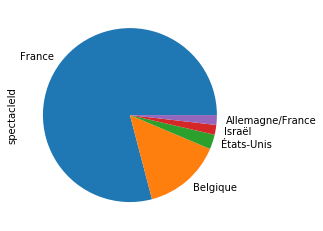

In [52]:
import urllib.request
import re
from bs4 import BeautifulSoup
import pandas as pd


#df_danse.Pays.value_counts().head(5)
df_danse_arsenal.groupby("Pays")["spectacleId"].count().sort_values(ascending=False).head(5).plot.pie()

## Grand théâtre

In [54]:
import time
import os
from datetime import datetime
import pandas as pd
organismId="383"


csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_spectacle.csv"
df_spectacle = pd.read_csv(csv_file_path)
#Filtre sur le genre - string contains danse

df_danse_lux=df_spectacle[df_spectacle['Genre'].astype(str).str.contains("Danse")]
df_danse_lux

,spectacleId,Genre,Durée,Pays,typeDate,date,organismeId,organismeName,to_analyse
0,29600,Danse,1 heure 15,France,Création le,2010-08-26,?IDX_Organisme=18808&Annee=2010,Festival d'opéra de Vérone,Création le
5,36100,Danse,NaN,Afrique du Sud,Création le,2011-11-16,?IDX_Organisme=383&Saison=2011,Grand Théâtre de la Ville de Luxembourg,Création le
11,38364,Danse,NaN,Belgique,NaN,NaN,NaN,NaN,Création 2011
15,28814,Danse,NaN,États-Unis,NaN,NaN,NaN,NaN,Création 2010
19,41657,Danse,NaN,Belgique,NaN,NaN,NaN,NaN,Création 2011
...,...,...,...,...,...,...,...,...,...
473,105349,Danse,1 heure,Luxembourg,NaN,NaN,NaN,NaN,NaN
475,105353,Danse,1 heure 10,Luxembourg,NaN,NaN,NaN,NaN,Création 2020
477,80188,Danse,1 heure 30,Belgique,Création le,2017-11-09,?IDX_Organisme=1074&Saison=2017,Kaaitheater,Création le
478,105354,Danse,NaN,Suisse/Luxembourg,NaN,NaN,NaN,NaN,NaN


### Répartition par pays

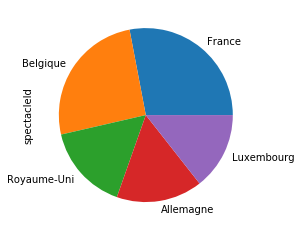

In [55]:
import urllib.request
import re
from bs4 import BeautifulSoup
import pandas as pd


#df_danse.Pays.value_counts().head(5)
df_danse_lux.groupby("Pays")["spectacleId"].count().sort_values(ascending=False).head(5).plot.pie()

## CCAM

In [56]:
import time
import os
from datetime import datetime
import pandas as pd
organismId="699"


csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_spectacle.csv"
df_spectacle = pd.read_csv(csv_file_path)
#Filtre sur le genre - string contains danse

df_danse_ccam=df_spectacle[df_spectacle['Genre'].astype(str).str.contains("Danse")]
df_danse_ccam

,spectacleId,Genre,Pays,typeDate,date,organismeId,organismeName,to_analyse,Durée
6,29201,Danse,France,NaN,NaN,NaN,NaN,Création 2010,NaN
9,29203,Danse,France,Création le,2011-02-02,?IDX_Organisme=699&Saison=2010,CCAM,Création le,NaN
15,27906,Danse,France,Création le,2010-10-01,?IDX_Organisme=1342&Annee=2010,Théâtre du Point du Jour,Création le,NaN
20,29208,Danse,France,NaN,NaN,NaN,NaN,Création 2010,NaN
41,37959,Danse – Jeune public – à partir de 5 ans,France,Création le,2012-01-12,?IDX_Organisme=953&Saison=2011,Théâtre Brétigny,Création le,50 minutes
...,...,...,...,...,...,...,...,...,...
283,2579,Danse,France,Création le,2007-06-24,?IDX_Organisme=339&Annee=2007,Chai du Terral,Création le,1 heure
284,59223,Danse,France,Création le,2012-03-27,?IDX_Organisme=9286&Annee=2012,Théâtre de Vanves,Création le,55 minutes
286,99502,Danse,France,NaN,NaN,NaN,NaN,NaN,50 minutes
290,90781,Danse – Musique,France,NaN,NaN,NaN,NaN,NaN,50 minutes


### Répartition par pays

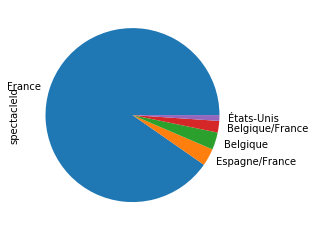

In [57]:
#df_danse.Pays.value_counts().head(5)
df_danse_ccam.groupby("Pays")["spectacleId"].count().sort_values(ascending=False).head(5).plot.pie()

## Carreau

In [58]:
import time
import os
from datetime import datetime
import pandas as pd
organismId="1914"


csv_file_path = os.getcwd() + "/data/all_10_years_organism_" + organismId + "_type_spectacle.csv"
df_spectacle = pd.read_csv(csv_file_path)
#Filtre sur le genre - string contains danse

df_danse_carreau=df_spectacle[df_spectacle['Genre'].astype(str).str.contains("Danse")]
df_danse_carreau

,spectacleId,Genre,Pays,typeDate,date,organismeId,organismeName,to_analyse,Durée
3,27687,Danse – Musique – à partir de 6 ans,France,Création le,2010-09-25,?IDX_Organisme=1342&Annee=2010,Maison de la Danse de Lyon,Création le,1 heure 5
7,10120,Danse,Belgique,NaN,NaN,NaN,NaN,Création 2008,NaN
10,21054,Théâtre – Danse – Jeune public – à partir de 7...,France,Création le,2010-01-19,?IDX_Organisme=1022&Saison=2009,Théâtre des Cordes,Création le,55 minutes
12,27180,Théâtre – Danse,Belgique,Création le,2010-07-09,?IDX_Organisme=2776&Annee=2010,Salle de spectacle de Vedène,Création le,NaN
20,12382,Danse,France,Création le,2009-01-17,?IDX_Organisme=1593&Saison=2008,Théâtre de la Cité Internationale,Création le,NaN
...,...,...,...,...,...,...,...,...,...
218,94433,Danse,Belgique,Création le,2018-03-22,?IDX_Organisme=12755&Saison=2017,Les Brigittines,Création le,1 heure 15
219,89074,Danse,Belgique,Création le,2018-10-20,?IDX_Organisme=2113&Saison=2018,Koninklijke Vlaamse Schouwburg,Création le,1 heure 45
221,74272,Danse – Musique,France,NaN,NaN,NaN,NaN,Création 2015,50 minutes
223,80629,Danse – à partir de 10 ans,Belgique,Création le,2017-09-28,?IDX_Organisme=1643&Saison=2017,deSingel,Création le,1 heure 15


### Répartition par pays

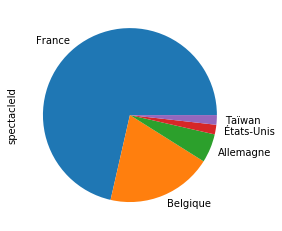

In [59]:
#df_danse.Pays.value_counts().head(5)
df_danse_carreau.groupby("Pays")["spectacleId"].count().sort_values(ascending=False).head(5).plot.pie()